# Deep Learning para Series de Tiempo

Resolver un problema de predicción de series de tiempo para predecir las mascotas que recibirá un refugio de animales domésticos. Dividir entre perros y gatos.

**Estudiante:** Micaela Del Longo

**Dataset:** https://www.kaggle.com/datasets/jinbonnie/animal-data

**Dataset Original:** https://data.bloomington.in.gov/Public-Works/Animal-Shelter-Animals/e245-r9ub/about_data

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Exploratorio de Datos

In [156]:
# cargamos el dataset
df = pd.read_csv('micaela_data/Animal_Shelter.csv')
# renombramos las columnas para que tengan un formato más amigable
df = df.rename(
	columns={
		'id': 'ID',
		'intakedate': 'Intake Date',
		'intakereason': 'Intake Reason',
		'istransfer': 'Is Transfer',
		'sheltercode': 'Shelter Code',
		'identichipnumber': 'Identi Chip Number',
		'animalname': 'Animal Name',
		'breedname': 'Breed Name',
		'basecolour': 'Base Colour',
		'speciesname': 'Species Name',
		'animalage': 'Animal Age',
		'sexname': 'Sex Name',
		'location': 'Location',
		'movementdate': 'Movement Date',
		'movementtype': 'Movement Type',
		'istrial': 'Is Trial',
		'returndate': 'Return Date',
		'returnedreason': 'Returned Reason',
		'deceaseddate': 'Deceased Date',
		'deceasedreason': 'Deceased Reason',
		'diedoffshelter': 'Died Off Shelter',
		'puttosleep': 'Put to Sleep',
		'isdoa': 'Is DOA'
	}
)

In [44]:
print("Primeras 15 Filas del Dataset\n")
df.head(15)

Primeras 15 Filas del Dataset



,ID,Intake Date,Intake Reason,Is Transfer,Shelter Code,Identi Chip Number,Animal Name,Breed Name,Base Colour,Species Name,...,Movement Date,Movement Type,Is Trial,Return Date,Returned Reason,Deceased Date,Deceased Reason,Died Off Shelter,Put to Sleep,Is DOA
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,...,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,02/29/2020 12:00:00 AM,Reclaimed,False,11/06/2023 12:00:00 AM,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
4,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,12/17/2023 12:00:00 AM,Adoption,False,NaN,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
5,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,NaN,NaN,False,NaN,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
6,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,NaN,NaN,False,NaN,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
7,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False
8,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,05/29/2018 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
9,31469,03/26/2013 12:00:00 AM,Incompatible with owner lifestyle,False,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,...,03/30/2013 12:00:00 AM,Adoption,False,05/08/2017 12:00:00 AM,Incompatible with owner lifestyle,NaN,Died in care,False,False,False


In [45]:
print("Tipos de Datos")
print(df.dtypes)

shape = df.shape
print("\nCantidad de Filas: %d\nCantidad de Columnas: %d\n" % (shape[0], shape[1]))

print("Duplicados: %d" % df.duplicated().sum())


Tipos de Datos
ID                     int64
Intake Date           object
Intake Reason         object
Is Transfer             bool
Shelter Code          object
Identi Chip Number    object
Animal Name           object
Breed Name            object
Base Colour           object
Species Name          object
Animal Age            object
Sex Name              object
Location              object
Movement Date         object
Movement Type         object
Is Trial                bool
Return Date           object
Returned Reason       object
Deceased Date         object
Deceased Reason       object
Died Off Shelter        bool
Put to Sleep            bool
Is DOA                  bool
dtype: object

Cantidad de Filas: 36613
Cantidad de Columnas: 23

Duplicados: 3645


## Descripción de las Columnas

| Columna            | Descripción                                              |
|--------------------|----------------------------------------------------------|
| ID                 | ID del animal en el refugio                              |
| Intake Date        | Fecha en la que ingresó el animal por 1ra vez al refugio |
| Intake Reason      | Razón de ingreso del animal al refugio                   |
| Is Transfer        | Si el animal fue transferido a el refugio                |
| Shelter Code       | Código del refugio                                       |
| Identi Chip Number | Número de identificación del animal                      |
| Animal Name        | Nombre del animal                                        |
| Breed Name         | Raza del animal                                          |
| Base Colour        | Color del animal                                         |
| Species Name       | Especie del animal                                       |
| Animal Age         | Edad del animal                                          |
| Sex Name           | Sexo del animal                                          |
| Location           | Ubicación del animal                                     |
| Movement Date      | Fecha de movimiento afuera del refugio del animal        |
| Movement Type      | Tipo de movimiento                                       |
| Is Trial           | Si el animal está en prueba                              |
| Return Date        | Fecha de retorno del animal al refugio                   |
| Returned Reason    | Razón de retorno                                         |
| Deceased Date      | Fecha de fallecimiento del animal                        |
| Deceased Reason    | Razón de fallecimiento                                   |
| Died Off Shelter   | Si el animal murió fuera del refugio                     |
| Put to Sleep       | Si el animal fue sacrificado                             |
| Is DOA             | Si el animal llegó muerto al refugio                     |

## Preprocesamiento de Datos

In [157]:
# eliminar todas las filas que no sean perros o gatos
df_filtered = df[df['Species Name'].isin(['Dog', 'Cat'])].copy()
# convertir las fechas a formato datetime
df_filtered['Intake DateTime'] = pd.to_datetime(df_filtered['Intake Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df_filtered['Movement DateTime'] = pd.to_datetime(df_filtered['Movement Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df_filtered['Return DateTime'] = pd.to_datetime(df_filtered['Return Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df_filtered['Deceased DateTime'] = pd.to_datetime(df_filtered['Deceased Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

filtered_shape = df_filtered.shape
print("\nCantidad de Filas: %d\nCantidad de Columnas: %d\n" % (filtered_shape[0], filtered_shape[1]))

df_filtered.head(20)


Cantidad de Filas: 35158
Cantidad de Columnas: 27



,ID,Intake Date,Intake Reason,Is Transfer,Shelter Code,Identi Chip Number,Animal Name,Breed Name,Base Colour,Species Name,...,Returned Reason,Deceased Date,Deceased Reason,Died Off Shelter,Put to Sleep,Is DOA,Intake DateTime,Movement DateTime,Return DateTime,Deceased DateTime
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,...,Stray,NaN,Died in care,False,False,False,2009-11-28,2017-05-13,NaT,NaT
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,Stray,NaN,Died in care,False,False,False,2009-12-08,2017-04-24,NaT,NaT
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,2017-04-15,2020-02-28,2024-06-28
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,2020-02-29,2023-11-06,2024-06-28
4,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,2023-12-17,NaT,2024-06-28
5,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,NaT,NaT,2024-06-28
6,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,NaT,NaT,2024-06-28
7,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,Stray,NaN,Died in care,False,False,False,2013-01-11,2017-04-18,2018-05-29,NaT
8,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,Stray,NaN,Died in care,False,False,False,2013-01-11,2018-05-29,NaT,NaT
9,31469,03/26/2013 12:00:00 AM,Incompatible with owner lifestyle,False,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,...,Incompatible with owner lifestyle,NaN,Died in care,False,False,False,2013-03-26,2013-03-30,2017-05-08,NaT


In [158]:
print("Cantidad de Intake DateTimes Únicos: %d" % len(df_filtered['Intake DateTime'].unique()))
print("Cantidad de Movement DateTimes Únicos: %d" % len(df_filtered['Movement DateTime'].unique()))
print("Cantidad de Return DateTimes Únicos: %d" % len(df_filtered['Return DateTime'].unique()))
print("Cantidad de Deceased DateTimes Únicos: %d" % len(df_filtered['Deceased DateTime'].unique()))

Cantidad de Intake DateTimes Únicos: 2604
Cantidad de Movement DateTimes Únicos: 2648
Cantidad de Return DateTimes Únicos: 2386
Cantidad de Deceased DateTimes Únicos: 566


In [159]:
# Tomo las columnas de interés para el análisis de series de tiempo: 'Intake DateTime', 'Movement DateTime', 'Return DateTime' y 'Deceased DateTime'.

df_intake = df_filtered[['Intake DateTime', 'Species Name', 'ID']].copy()
df_intake = df_intake.drop_duplicates()  # eliminar las filas duplicadas
intake_shape = df_intake.shape
print("\nCantidad de Filas: %d\nCantidad de Columnas: %d\n" % (intake_shape[0], intake_shape[1]))

df_movement = df_filtered[['Movement DateTime', 'Species Name', 'ID']].copy()
df_movement = df_movement.drop_duplicates()
movement_shape = df_movement.shape
print("\nCantidad de Filas: %d\nCantidad de Columnas: %d\n" % (movement_shape[0], movement_shape[1]))
print("Cantidad de Movement DateTimes Nulos: %d" % df_movement['Movement DateTime'].isnull().sum())
df_movement = df_movement.dropna()

df_return = df_filtered[['Return DateTime', 'Species Name', 'ID']].copy()
df_return = df_return.drop_duplicates()
return_shape = df_return.shape
print("\nCantidad de Filas: %d\nCantidad de Columnas: %d\n" % (return_shape[0], return_shape[1]))
print("Cantidad de Return DateTimes Nulos: %d" % df_return['Return DateTime'].isnull().sum())
df_return = df_return.dropna()

df_deceased = df_filtered[['Deceased DateTime', 'Species Name', 'ID']].copy()
df_deceased = df_deceased.drop_duplicates()
deceased_shape = df_deceased.shape
print("\nCantidad de Filas: %d\nCantidad de Columnas: %d\n" % (deceased_shape[0], deceased_shape[1]))
print("Cantidad de Deceased DateTimes Nulos: %d" % df_deceased['Deceased DateTime'].isnull().sum())
df_deceased = df_deceased.dropna()


Cantidad de Filas: 18445
Cantidad de Columnas: 3


Cantidad de Filas: 31488
Cantidad de Columnas: 3

Cantidad de Movement DateTimes Nulos: 2580

Cantidad de Filas: 29028
Cantidad de Columnas: 3

Cantidad de Return DateTimes Nulos: 18014

Cantidad de Filas: 18445
Cantidad de Columnas: 3

Cantidad de Deceased DateTimes Nulos: 17756


In [180]:
# Calculo la cantidad de perros y gatos que ingresaron/egresaron/volvieron/fallecieron por día. 

df_grouped_intake = df_intake.groupby(['Intake DateTime', 'Species Name']).size().unstack().fillna(0)
df_grouped_intake.columns = df_grouped_intake.rename(columns={'Cat': 'Intake Cats', 'Dog': 'Intake Dogs'}).columns

df_grouped_movement = df_movement.groupby(['Movement DateTime', 'Species Name']).size().unstack().fillna(0)
df_grouped_movement.columns = df_grouped_movement.rename(columns={'Cat': 'Moved Cats', 'Dog': 'Moved Dogs'}).columns

df_grouped_return = df_return.groupby(['Return DateTime', 'Species Name']).size().unstack().fillna(0)
df_grouped_return.columns = df_grouped_return.rename(columns={'Cat': 'Returned Cats', 'Dog': 'Returned Dogs'}).columns

df_grouped_deceased = df_deceased.groupby(['Deceased DateTime', 'Species Name']).size().unstack().fillna(0)
df_grouped_deceased.columns = df_grouped_deceased.rename(columns={'Cat': 'Deceased Cats', 'Dog': 'Deceased Dogs'}).columns

In [181]:
# Agrupo a todos los registros en un solo DataFrame

# Reseteo los índices para poder concatenar los DataFrames en la fecha
df_grouped_intake_reset = df_grouped_intake.reset_index()
df_grouped_movement_reset = df_grouped_movement.reset_index()
df_grouped_return_reset = df_grouped_return.reset_index()
df_grouped_deceased_reset = df_grouped_deceased.reset_index()

# Renombro las columnas para que tengan el mismo nombre
df_grouped_intake_rename = df_grouped_intake_reset.rename(columns={'Intake DateTime': 'Date'})
df_grouped_movement_rename = df_grouped_movement_reset.rename(columns={'Movement DateTime': 'Date'})
df_grouped_return_rename = df_grouped_return_reset.rename(columns={'Return DateTime': 'Date'})
df_grouped_deceased_rename = df_grouped_deceased_reset.rename(columns={'Deceased DateTime': 'Date'})

df_combined = pd.merge(df_grouped_intake_rename, df_grouped_movement_rename, on='Date', how='outer')
df_combined = pd.merge(df_combined, df_grouped_return_rename, on='Date', how='outer')
df_combined = pd.merge(df_combined, df_grouped_deceased_rename, on='Date', how='outer')
df_combined = df_combined.fillna(0)
df_combined = df_combined.set_index('Date', drop=True)
df_combined.index = pd.to_datetime(df_combined.index)

print("Cantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_combined.shape[0], df_combined.shape[1]))
print(df_combined.columns)
df_combined.head(10)

Cantidad de Filas: 2745
Cantidad de Columnas: 8

Index(['Intake Cats', 'Intake Dogs', 'Moved Cats', 'Moved Dogs',
       'Returned Cats', 'Returned Dogs', 'Deceased Cats', 'Deceased Dogs'],
      dtype='object', name='Species Name')


Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
Date,,,,,,,,
2009-11-28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-08,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-03-26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


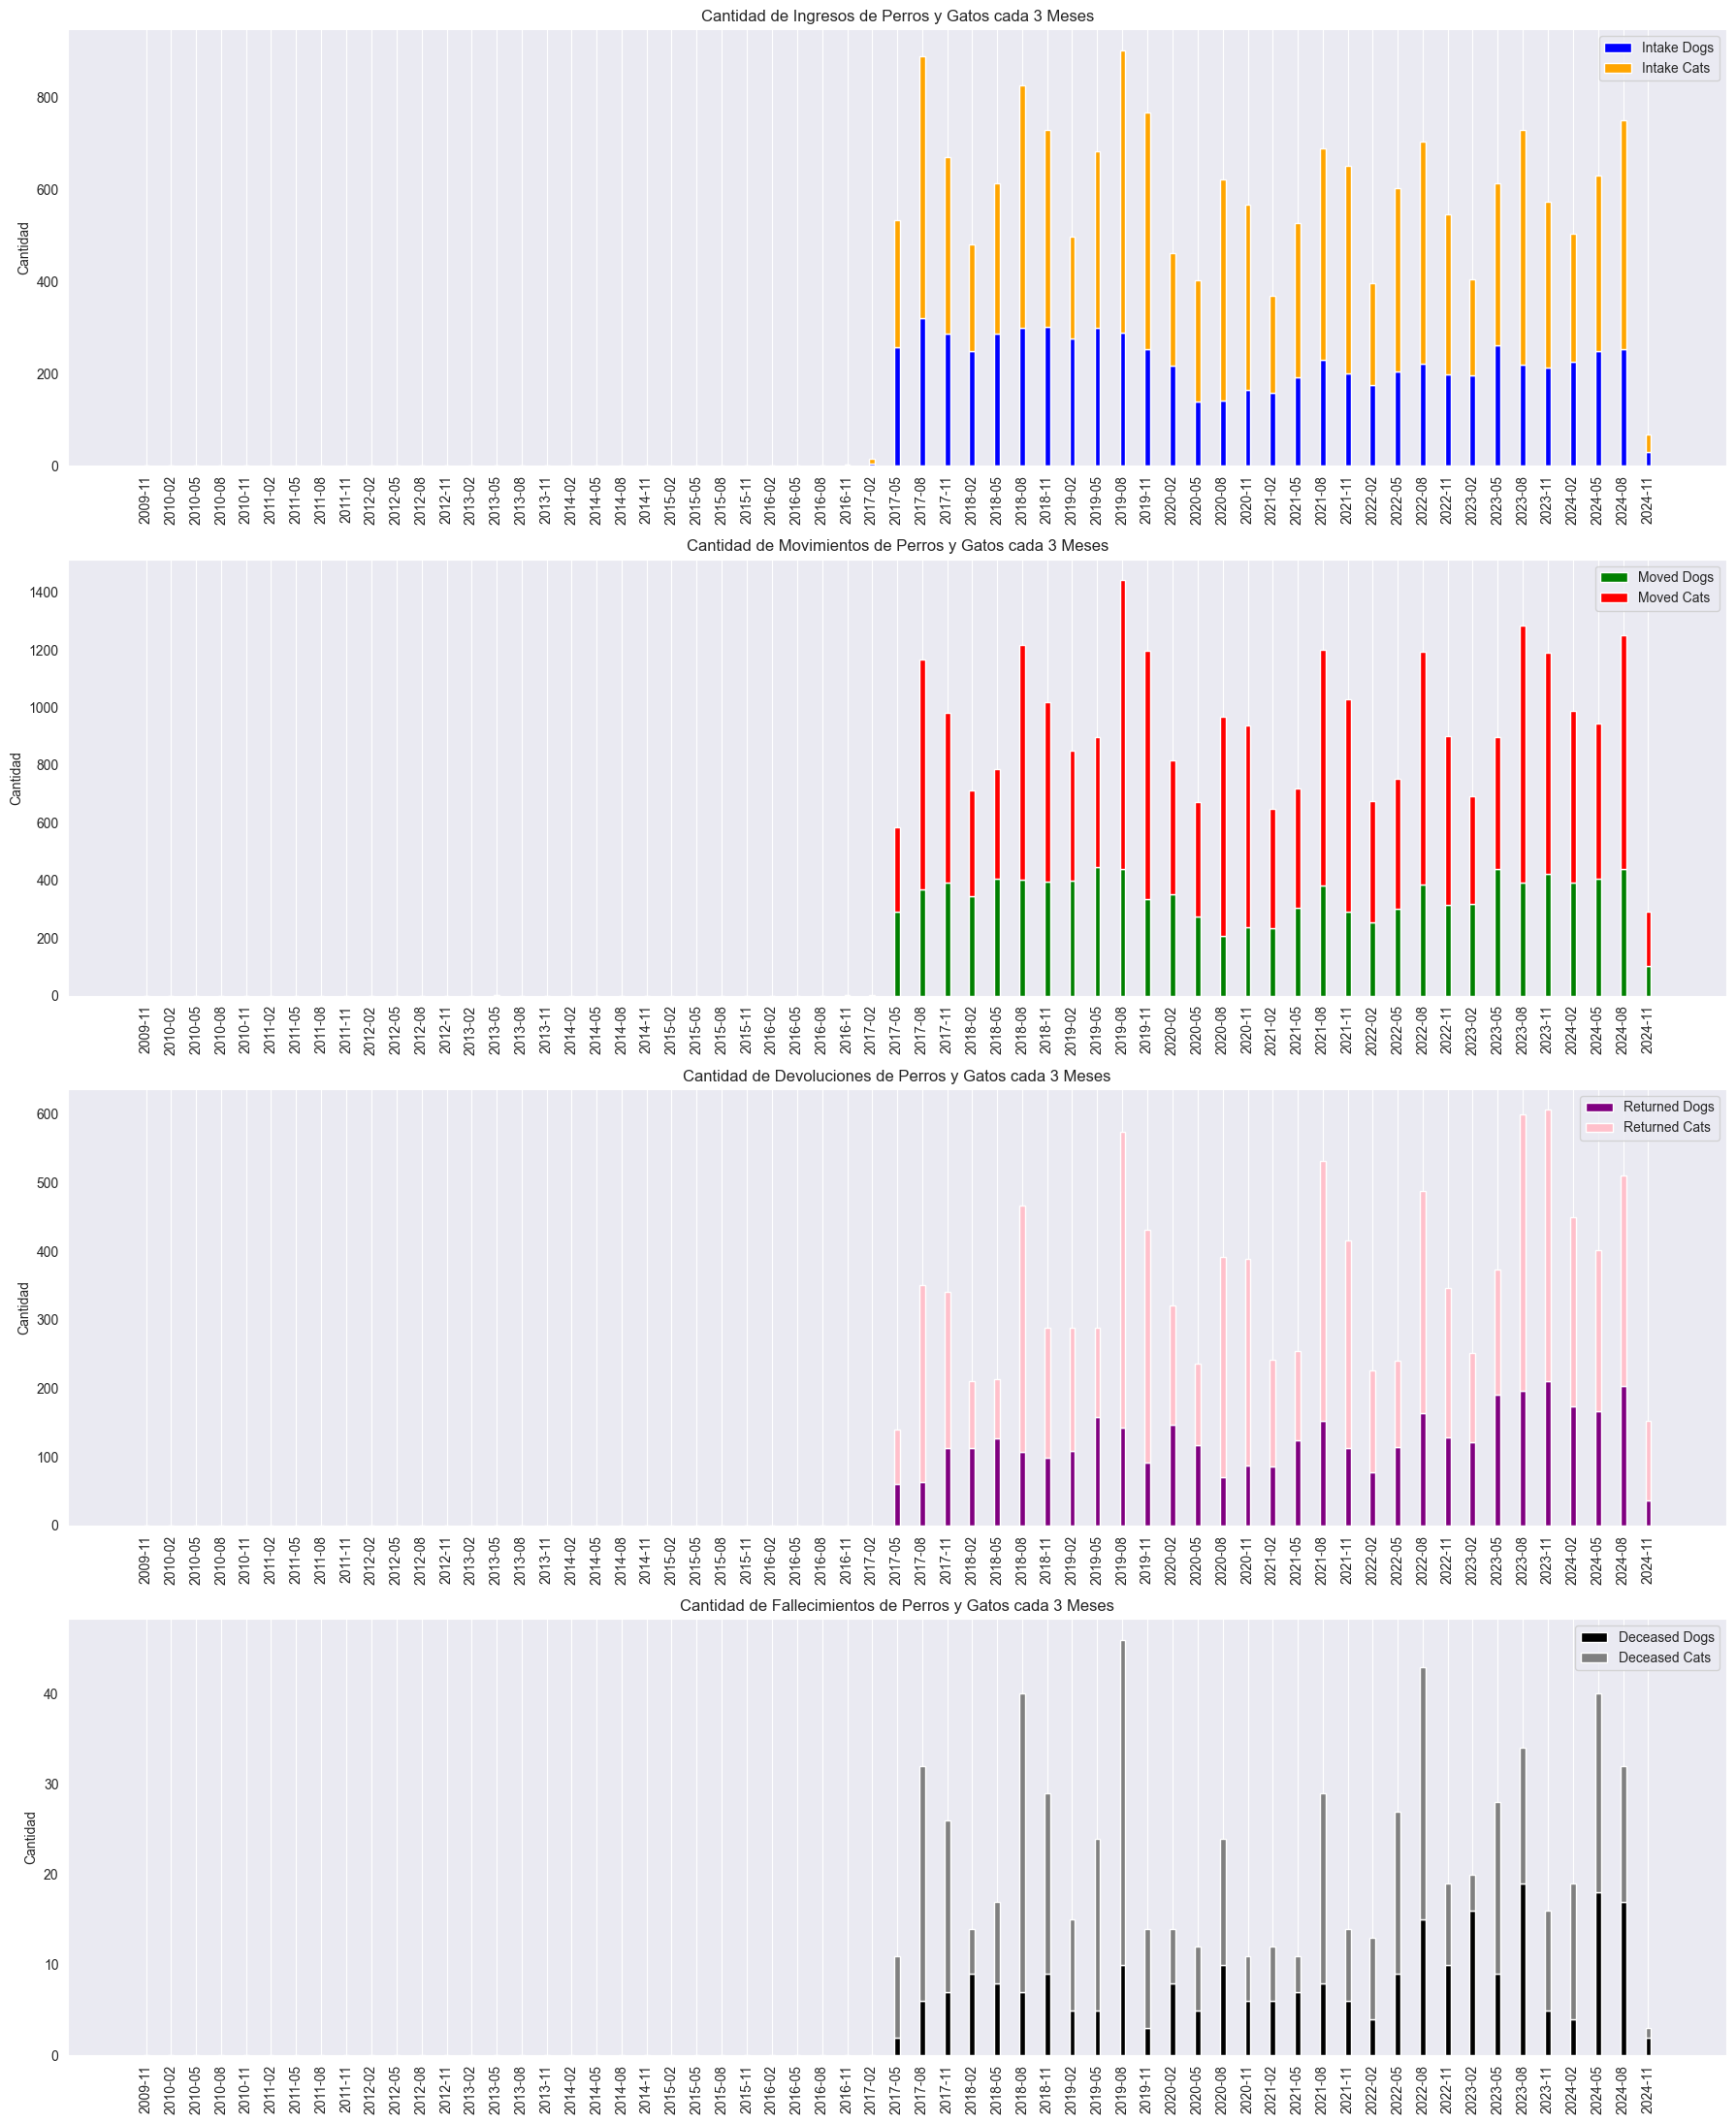

In [187]:
# Resample the DataFrame to 3-month intervals and sum the values
df_resampled = df_combined.resample('3M').sum()

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(18, 22))

# Flatten the 2D array of axes for easy iteration
axs = axs.flatten()

# Plot each category in a separate subplot
axs[0].bar(df_resampled.index, df_resampled['Intake Dogs'], label='Intake Dogs', color='blue', width=20, align='center')
axs[0].bar(df_resampled.index, df_resampled['Intake Cats'], label='Intake Cats', color='orange', width=20, align='center', bottom=df_resampled['Intake Dogs'])
axs[0].set_title('Cantidad de Ingresos de Perros y Gatos cada 3 Meses')
axs[0].set_ylabel('Cantidad')
axs[0].legend()
axs[0].grid(axis='y')

axs[1].bar(df_resampled.index, df_resampled['Moved Dogs'], label='Moved Dogs', color='green', width=20, align='center')
axs[1].bar(df_resampled.index, df_resampled['Moved Cats'], label='Moved Cats', color='red', width=20, align='center', bottom=df_resampled['Moved Dogs'])
axs[1].set_title('Cantidad de Movimientos de Perros y Gatos cada 3 Meses')
axs[1].set_ylabel('Cantidad')
axs[1].legend()
axs[1].grid(axis='y')

axs[2].bar(df_resampled.index, df_resampled['Returned Dogs'], label='Returned Dogs', color='purple', width=20, align='center')
axs[2].bar(df_resampled.index, df_resampled['Returned Cats'], label='Returned Cats', color='pink', width=20, align='center', bottom=df_resampled['Returned Dogs'])
axs[2].set_title('Cantidad de Devoluciones de Perros y Gatos cada 3 Meses')
axs[2].set_ylabel('Cantidad')
axs[2].legend()
axs[2].grid(axis='y')

axs[3].bar(df_resampled.index, df_resampled['Deceased Dogs'], label='Deceased Dogs', color='black', width=20, align='center')
axs[3].bar(df_resampled.index, df_resampled['Deceased Cats'], label='Deceased Cats', color='grey', width=20, align='center', bottom=df_resampled['Deceased Dogs'])
axs[3].set_title('Cantidad de Fallecimientos de Perros y Gatos cada 3 Meses')
axs[3].set_ylabel('Cantidad')
axs[3].legend()
axs[3].grid(axis='y')

# Customize the x-axis labels
for ax in axs:
    ax.set_xticks(df_resampled.index)
    ax.set_xticklabels(df_resampled.index.strftime('%Y-%m'), rotation=90)

plt.tight_layout()
plt.savefig('micaela_data/figs/histogram_4.png')
plt.show()


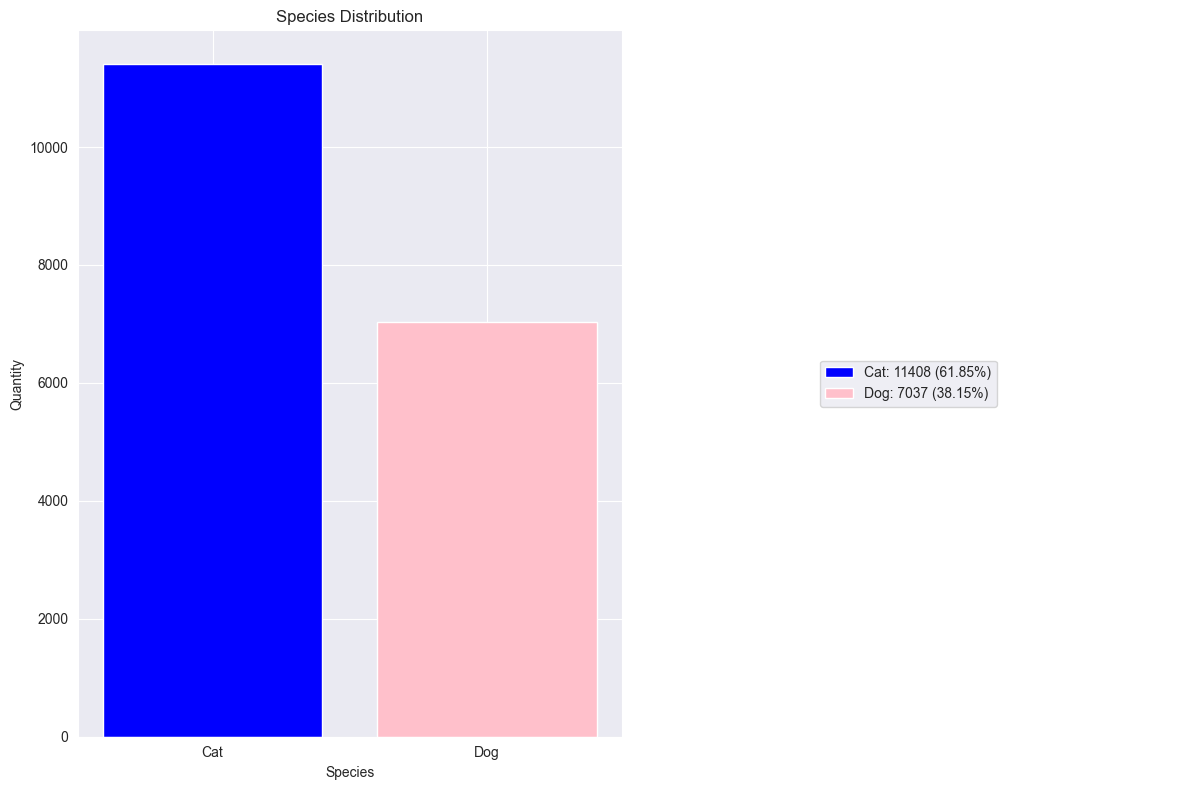

In [27]:
species_counts = df['Species Name'].value_counts()
species = species_counts.index  # species names
counts = species_counts.values  # species counts
percentages = counts / counts.sum() * 100  # species distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))  # Create a figure and a set of subplots

bars = ax1.bar(species, counts, color=['blue', 'pink'])
ax1.set_xlabel('Species')
ax1.set_ylabel('Quantity')
ax1.set_title('Species Distribution')
ax1.set_xticks(species)
ax1.set_xticklabels(species)

ax2.axis('off')  # Turn off the axis
ax2.legend(bars, [f"{species[i]}: {counts[i]} ({percentages[i]:.2f}%)" for i in range(2)], loc="center")

plt.tight_layout()